In [8]:
import pandas as pd
import copy 
import numpy as np

from Chapter3.OutlierDetection import DistributionBasedOutlierDetection

from util.VisualizeDataset import VisualizeDataset

dataset = pd.read_csv('dataset_gran_250.csv')


print(dataset.trial.unique())
print(dataset.id.unique())
print(dataset.columns)

[ 1.  2. 11.  3.  4. 12.  7.  8. 15.  9. 16.  6. 14.  5. 13.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]
Index(['Unnamed: 0', 'attitude.roll', 'attitude.pitch', 'attitude.yaw',
       'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z',
       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
       'rotationRate.y', 'rotationRate.z', 'act', 'id', 'weight', 'height',
       'age', 'gender', 'trial', 'timestamp'],
      dtype='object')


In [2]:
# Visual inspection seems to show everything within a normal range
# for col in dataset.columns:
#     plt.figure()
#     plt.title("Granularity 250 ms" + col)
#     dataset[col].hist()
#     plt.show()

In [3]:
dist_detection = DistributionBasedOutlierDetection()

trials = [dataset[dataset['trial']==i] for i in dataset.trial.unique()]

for tt in trials:
    print(tt.size)

84609
99498
38010
97965
119595
47313
266805
202503
109872
175497
50463
377916
137298
394443
175119


In [23]:
predictor_columns = ['attitude.roll', 'attitude.pitch', 'attitude.yaw',
                       'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z',
                       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
                       'rotationRate.y', 'rotationRate.z']

In [22]:
# only impute outliers for sensor-measured columns

try:
    outlier_df = pd.read_csv('dataset_outliers_imputed.csv')
    raise FileNotFoundError()
except FileNotFoundError:
    print('File not found.. Generating outliers')
    outlier_df = copy.deepcopy(dataset)
    
    for col in predictor_columns:
        dist_detection.chauvenet(outlier_df, col)
        
        
        print("this col is done: ", col)
    print('All done, saving for future usage')
    
    outlier_df.to_csv('dataset_outliers_imputed.csv')


File not found.. Generating outliers
0         1.115102
1         0.832973
2         1.122985
3         1.203272
4         0.992189
            ...   
113181    1.488623
113182    1.488256
113183    1.488400
113184    1.489169
113185    1.488491
Name: attitude.roll, Length: 113186, dtype: float64
attitude.roll
this col is done:  attitude.roll
0         0.651151
1         0.726295
2         0.367053
3         0.426061
4         0.518871
            ...   
113181    1.346323
113182    1.348585
113183    1.347742
113184    1.347558
113185    1.347242
Name: attitude.pitch, Length: 113186, dtype: float64
attitude.pitch
this col is done:  attitude.pitch
0         0.560940
1         0.464817
2         0.691775
3         0.722151
4         0.755591
            ...   
113181    0.041514
113182    0.041792
113183    0.041924
113184    0.041777
113185    0.041980
Name: attitude.yaw, Length: 113186, dtype: float64
attitude.yaw
this col is done:  attitude.yaw
0         0.644216
1         1.375854
2

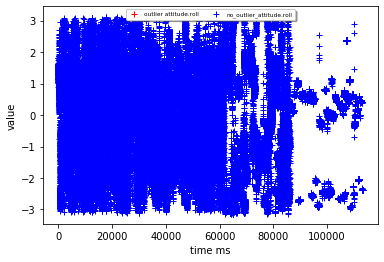

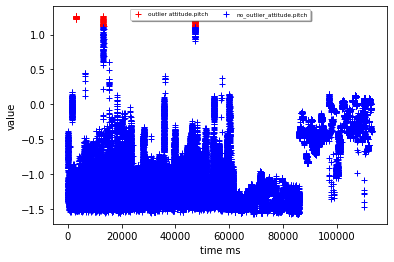

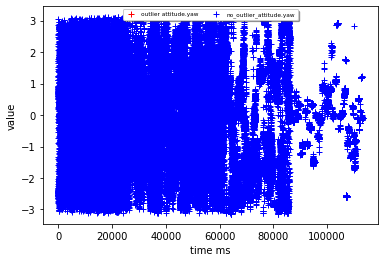

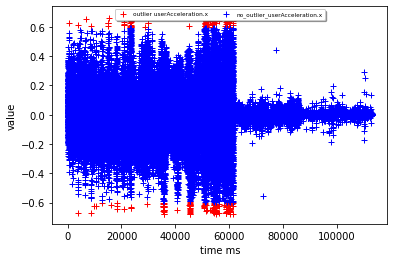

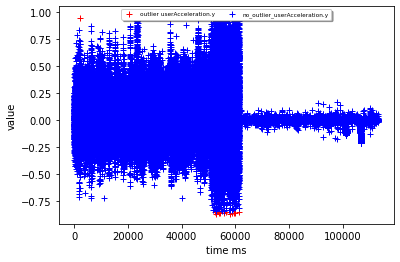

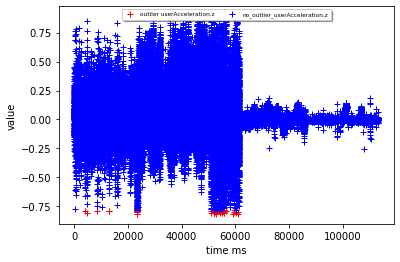

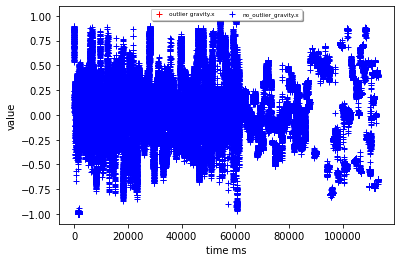

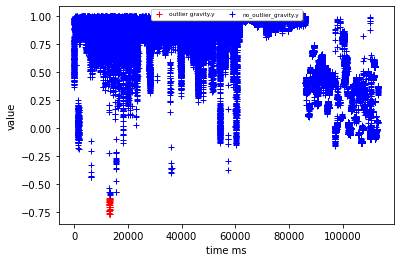

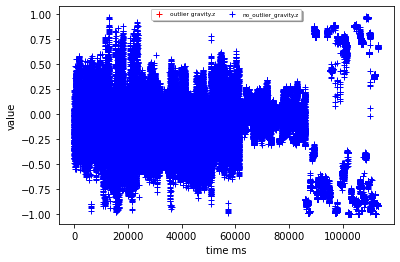

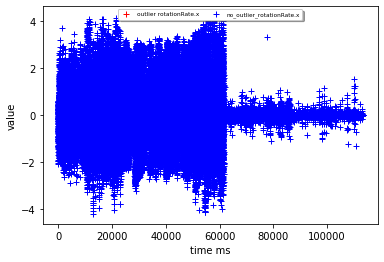

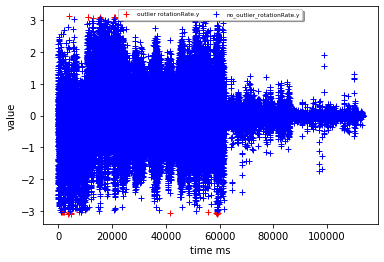

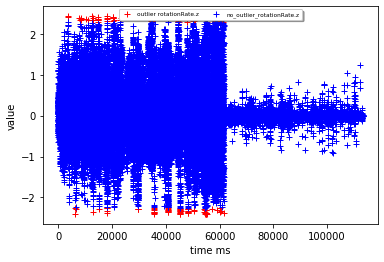

In [24]:
vis = VisualizeDataset()

for col in predictor_columns:
    vis.plot_binary_outliers(outlier_df, col, col + '_outlier')

# Actually remove outliers (set to nan)

# impute missing values

In [25]:
for col in predictor_columns:
    outlier_df.loc[outlier_df[f'{col}_outlier'] == True, col] = np.nan

In [13]:
display(outlier_df.describe())
print(outlier_df.columns)

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,userAcceleration.x,userAcceleration.y,userAcceleration.z,gravity.x,gravity.y,gravity.z,...,rotationRate.y,rotationRate.z,act,id,weight,height,age,gender,trial,timestamp
count,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,...,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000
mean,59724.252558,-0.175937,-0.986736,-0.149128,-0.003872,0.044286,0.039287,0.042144,0.754788,-0.138825,...,0.014520,0.012624,2.949119,11.471357,72.120810,173.989610,28.832409,0.573693,7.574046,59844.071087
std,51884.357213,1.473105,0.489813,1.423758,0.147763,0.199536,0.186378,0.336458,0.331895,0.421722,...,0.677423,0.526288,1.644120,6.924883,15.980825,8.798505,5.303769,0.494542,3.902364,51884.284343
min,0.000000,-3.140731,-1.566813,-3.140410,-1.448202,-1.183898,-1.596738,-0.998976,-0.999039,-0.999997,...,-5.887341,-5.642336,0.000000,0.000000,48.000000,161.000000,18.000000,0.000000,1.000000,120.000000
25%,19750.000000,-1.394752,-1.347766,-1.215849,-0.033034,-0.010482,-0.012714,-0.169744,0.589617,-0.381457,...,-0.119788,-0.061490,2.000000,6.000000,60.000000,164.000000,25.000000,0.000000,5.000000,19870.000000
50%,44500.000000,0.082338,-1.186205,-0.114155,0.000873,0.006415,0.005085,0.020178,0.923567,-0.097866,...,0.000223,0.000256,3.000000,12.000000,72.000000,175.000000,28.000000,1.000000,7.000000,44620.000000
75%,86250.000000,0.859166,-0.634328,0.785611,0.030925,0.091216,0.088551,0.268674,0.973216,0.076238,...,0.169273,0.078662,4.000000,18.000000,78.000000,180.000000,31.000000,1.000000,9.000000,86370.000000
max,328250.000000,3.139792,1.529981,3.140133,1.337906,2.794751,2.014296,0.996075,0.999991,0.977828,...,5.072615,6.942180,5.000000,23.000000,102.000000,190.000000,46.000000,1.000000,16.000000,328360.000000


Index(['Unnamed: 0', 'attitude.roll', 'attitude.pitch', 'attitude.yaw',
       'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z',
       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
       'rotationRate.y', 'rotationRate.z', 'act', 'id', 'weight', 'height',
       'age', 'gender', 'trial', 'timestamp', 'attitude.roll_outlier',
       'attitude.pitch_outlier', 'attitude.yaw_outlier',
       'userAcceleration.x_outlier', 'userAcceleration.y_outlier',
       'userAcceleration.z_outlier', 'gravity.x_outlier', 'gravity.y_outlier',
       'gravity.z_outlier', 'rotationRate.x_outlier', 'rotationRate.y_outlier',
       'rotationRate.z_outlier'],
      dtype='object')


In [26]:
from Chapter3.ImputationMissingValues import ImputationMissingValues
import itertools
import numpy as np


imp_helper = ImputationMissingValues()

imputed_df = copy.deepcopy(outlier_df)

print(outlier_df.trial.unique())
print(outlier_df.id.unique())

frames = []

for trial in outlier_df.trial.unique():
    for person in outlier_df.id.unique():
        print(f'Doing trial {trial} and person {person}')

        partdf = imputed_df[(imputed_df.id == person) & (imputed_df.trial == trial)]

        for col in predictor_columns:
            partdf = imp_helper.impute_interpolate(partdf, col)


[ 1. nan  2. 11.  3.  4. 12.  7.  8. 15.  9. 16.  6. 14.  5. 13.]
[ 0.  1.  2.  3. nan  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 19. 20. 21. 22. 23. 18.]
Doing trial 1.0 and person 0.0
Doing trial 1.0 and person 1.0
Doing trial 1.0 and person 2.0
Doing trial 1.0 and person 3.0
Doing trial 1.0 and person nan
Doing trial 1.0 and person 4.0
Doing trial 1.0 and person 5.0
Doing trial 1.0 and person 6.0
Doing trial 1.0 and person 7.0
Doing trial 1.0 and person 8.0
Doing trial 1.0 and person 9.0
Doing trial 1.0 and person 10.0
Doing trial 1.0 and person 11.0
Doing trial 1.0 and person 12.0
Doing trial 1.0 and person 13.0
Doing trial 1.0 and person 14.0
Doing trial 1.0 and person 15.0
Doing trial 1.0 and person 16.0
Doing trial 1.0 and person 17.0
Doing trial 1.0 and person 19.0
Doing trial 1.0 and person 20.0
Doing trial 1.0 and person 21.0
Doing trial 1.0 and person 22.0
Doing trial 1.0 and person 23.0
Doing trial 1.0 and person 18.0


/Users/abel/Desktop/ai/AIMASTER/MLQS/ML4QS/ML4QS_Assignment_3/Chapter3/ImputationMissingValues.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset[col].interpolate()
/Users/abel/Desktop/ai/AIMASTER/MLQS/ML4QS/ML4QS_Assignment_3/Chapter3/ImputationMissingValues.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset[col].fillna(method='bfill')


Doing trial nan and person 0.0
Doing trial nan and person 1.0
Doing trial nan and person 2.0
Doing trial nan and person 3.0
Doing trial nan and person nan
Doing trial nan and person 4.0
Doing trial nan and person 5.0
Doing trial nan and person 6.0
Doing trial nan and person 7.0
Doing trial nan and person 8.0
Doing trial nan and person 9.0
Doing trial nan and person 10.0
Doing trial nan and person 11.0
Doing trial nan and person 12.0
Doing trial nan and person 13.0
Doing trial nan and person 14.0
Doing trial nan and person 15.0
Doing trial nan and person 16.0
Doing trial nan and person 17.0
Doing trial nan and person 19.0
Doing trial nan and person 20.0
Doing trial nan and person 21.0
Doing trial nan and person 22.0
Doing trial nan and person 23.0
Doing trial nan and person 18.0
Doing trial 2.0 and person 0.0
Doing trial 2.0 and person 1.0
Doing trial 2.0 and person 2.0
Doing trial 2.0 and person 3.0
Doing trial 2.0 and person nan
Doing trial 2.0 and person 4.0
Doing trial 2.0 and perso

Doing trial 16.0 and person 15.0
Doing trial 16.0 and person 16.0
Doing trial 16.0 and person 17.0
Doing trial 16.0 and person 19.0
Doing trial 16.0 and person 20.0
Doing trial 16.0 and person 21.0
Doing trial 16.0 and person 22.0
Doing trial 16.0 and person 23.0
Doing trial 16.0 and person 18.0
Doing trial 6.0 and person 0.0
Doing trial 6.0 and person 1.0
Doing trial 6.0 and person 2.0
Doing trial 6.0 and person 3.0
Doing trial 6.0 and person nan
Doing trial 6.0 and person 4.0
Doing trial 6.0 and person 5.0
Doing trial 6.0 and person 6.0
Doing trial 6.0 and person 7.0
Doing trial 6.0 and person 8.0
Doing trial 6.0 and person 9.0
Doing trial 6.0 and person 10.0
Doing trial 6.0 and person 11.0
Doing trial 6.0 and person 12.0
Doing trial 6.0 and person 13.0
Doing trial 6.0 and person 14.0
Doing trial 6.0 and person 15.0
Doing trial 6.0 and person 16.0
Doing trial 6.0 and person 17.0
Doing trial 6.0 and person 19.0
Doing trial 6.0 and person 20.0
Doing trial 6.0 and person 21.0
Doing tria

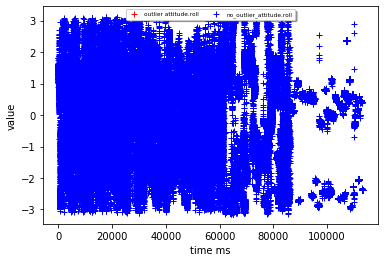

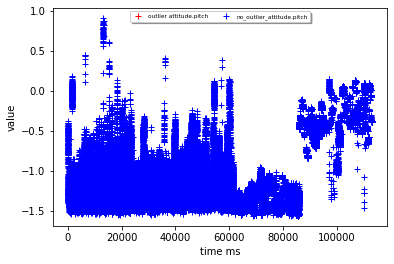

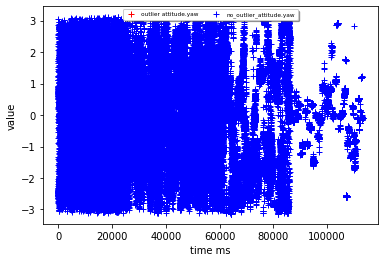

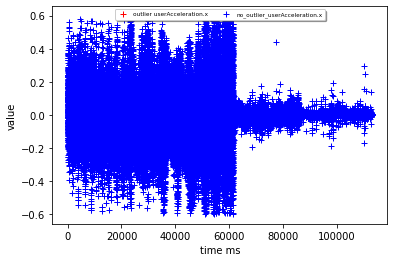

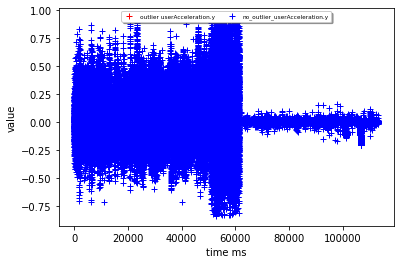

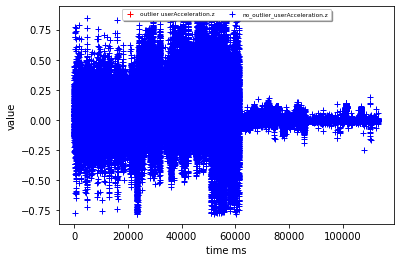

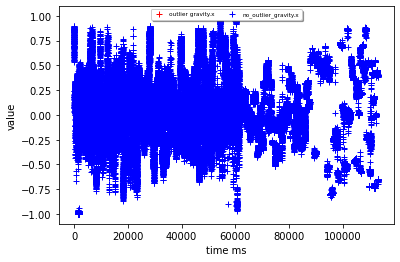

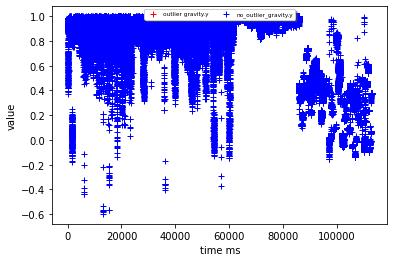

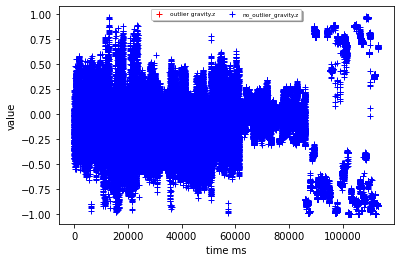

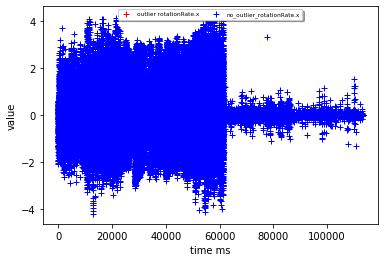

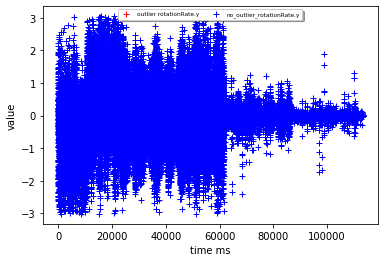

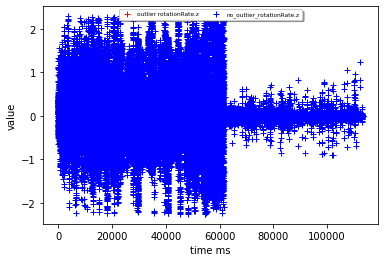

In [27]:
vis = VisualizeDataset()

for col in columns:
    vis.plot_binary_outliers(imputed_df, col, col + '_outlier')

In [28]:
imputed_df.to_csv("dataset_imputed_values.csv")